### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

In [1]:
%run init.ipynb

# Algoritmo de Bernstein-Vazirani

Vamos considerar uma função 
$$f:\{0,1\}^{n}\rightarrow \{0,1\}.$$
Ou seja, $f$ tem como input sequências de $n$ bits $x=x_{n-1}\cdots x_{1}x_{0}$ com $x_{j}=0$ ou $x_{j}=1$ e tem como output 0 ou 1. Vamos considerar um oráculo que contém uma __sequência secreta__ de bits 
$$s=s_{n-1}\cdots s_{1}s_{0}$$ 
e que, em cada _query_, nos retorna
$$f_{s}(x) = s\cdot x \equiv s\cdot x\mod2 = \sum_{j=0}^{n-1}s_{j}x_{j}\mod2.$$ 
O problema a ser resolvido é encontrar $s$:
$$s=?$$

Como cada pergunta ao oráculo nos fornece um único escalar como resposta, _classicamente_ o melhor que podemos fazer é fazer as seguintes $n$ perguntas:
\begin{align}
& f(100\cdots 00) = s_{n-1}, \\
& f(010\cdots 00) = s_{n-2}, \\
& f(001\cdots 00) = s_{n-3}, \\
& \vdots \\
& f(000\cdots 10) = s_{1}, \\
& f(000\cdots 01) = s_{0}.
\end{align}
Como exemplo, consideremos $n=3$ e $s=101$. Teremos que 
\begin{align}
& f(100) = 1s_{2}+0s_{1}+0s_{0} = s_{2},\\
& f(010) = 0s_{2}+1s_{1}+0s_{0} = s_{1}, \\
& f(001) = 0s_{2}+0s_{1}+1s_{0} = s_{0}.
\end{align}

_Quanticamente_, assim como no algoritmo de Deutsch-Jozsa (ADJ), começamos com $n+1$ qubits preparados no estado
$$|+\rangle^{\otimes n}\otimes|-\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|-\rangle =\frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes\big(|0\rangle-|1\rangle\big).$$
O oráculo funciona de forma similar a no caso do ADJ ($U_{f}|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle$):
$$U_{s}|x\rangle|y\rangle = |x\rangle|y\oplus s\cdot x\rangle.$$
Com isso, teremos que
\begin{align}
U_{s}|+\rangle^{n}|-\rangle & = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(U_{s}|x\rangle|0\rangle - U_{s}|x\rangle|1\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(|x\rangle|0\oplus s\cdot x\rangle - |x\rangle|1\oplus s\cdot x\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\big(|s\cdot x\rangle - |\overline{s\cdot x}\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle(-1)^{s\cdot x}\big(|0\rangle - |1\rangle\big) \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle |-\rangle.
\end{align}
Esse é o chamado _phase kickback_, pois a fase dependente de $x$ acaba sendo adicionada a este estado.

Os estados
$$|\psi_{s}\rangle := \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle$$
formam um conjunto ortonormal
\begin{align}
\langle\psi_{s}|\psi_{t}\rangle & = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{s\cdot x}\langle x|\sum_{y=0}^{2^{n}}(-1)^{t\cdot y}|y\rangle \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}}(-1)^{s\cdot x + t\cdot y}\langle x|y\rangle = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}}(-1)^{s\cdot x + t\cdot y}\delta_{y,x} \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{s\cdot x + t\cdot x} \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{(s+t)\cdot x},
\end{align}
em que usamos
\begin{align}
s\cdot x + t\cdot x & = \sum_{j=0}^{n-1}s_{j}x_{j}\mod2 + \sum_{j=0}^{n-1}t_{j}x_{j}\mod2 \\
& = \Big(\sum_{j=0}^{n-1}s_{j}x_{j} + \sum_{j=0}^{n-1}t_{j}x_{j}\Big)\mod2 \\
& = \sum_{j=0}^{n-1}(s_{j}+t_{j})x_{j}\mod2 \\
& = (s+t)\cdot x.
\end{align}

Agora, para um dado $k=s+t$ teremos
\begin{align}
\sum_{x=0}^{2^{n}}(-1)^{k\cdot x} & \equiv \sum_{x_{1}=0}^{1}\sum_{x_{2}=0}^{1}\cdots\sum_{x_{n}=0}^{1} (-1)^{k_{1}x_{1}+k_{2}x_{2}+\cdots+k_{n}x_{n}} \\
 & = \sum_{x_{1}=0}^{1}(-1)^{k_{1}x_{1}}\sum_{x_{2}=0}^{1}(-1)^{k_{2}x_{2}}\cdots\sum_{x_{n}=0}^{1} (-1)^{k_{n}x_{n}} \\
& = 2\delta_{k_{1},0}2\delta_{k_{2},0}\cdots 2\delta_{k_{n},0} \\
& = 2^{n}\delta_{k,0},
\end{align}
em que usamos
$$\sum_{x_{j}=0}^{1}(-1)^{k_{j}x_{j}} = (-1)^{k_{j}0}+(-1)^{k_{j}1} = 1+(-1)^{k_{j}} = 2\delta_{k_{j},0}.$$ 
Por conseguinte
$$\langle\psi_{s}|\psi_{t}\rangle = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{(s+t)\cdot x} =  \frac{1}{2^{n}}2^{n}\delta_{s+t,0} = \delta_{s,t},$$
pois a soma é feita bit a bit, e assim
$$s+t=0\ \therefore\ s=t.$$

Podemos verificar também que essa base é completa:
\begin{align}
\sum_{s=0}^{2^{n}-1}|\psi_{s}\rangle\langle\psi_{s}| & = \sum_{s=0}^{2^{n}-1}\frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{s\cdot y}\langle y| \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}\Big(\sum_{s=0}^{2^{n}-1}(-1)^{s\cdot(x+y)}\Big)|x\rangle\langle y| \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}2^{n}\delta_{x,y}|x\rangle\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle x| = \mathbb{I}_{2^{n}}.
\end{align}
A importância de $\{|\psi_{s}\rangle\}$ formar uma base ortonormal é que a princípio podemos medir nessa base, descobrindo assim o valor de $s$.

Agora, tendo o estado 
$$U_{s}|+\rangle^{\otimes n}|-\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle |-\rangle=|\psi_{s}\rangle|-\rangle,$$
vejamos como obter $s$. Consideremos a chamada __transformada de Hadamard__. Lembremos da porta de Hadamard,
$$H=\frac{1}{2^{1/2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix} = \frac{1}{2^{1/2}}\sum_{x,y=0}^{1}(-1)^{xy}|x\rangle\langle y|,$$
para escrever
\begin{align}
H^{\otimes n} & = H\otimes H\otimes\cdots\otimes H \\
& = \frac{1}{2^{1/2}}\sum_{x_{1},y_{1}=0}^{1}(-1)^{x_{1}y_{1}}|x_{1}\rangle\langle y_{1}|\otimes \frac{1}{2^{1/2}}\sum_{x_{2},y_{2}=0}^{1}(-1)^{x_{2}y_{2}}|x_{2}\rangle\langle y_{2}|\otimes\cdots\otimes \frac{1}{2^{1/2}}\sum_{x_{n},y_{n}=0}^{1}(-1)^{x_{n}y_{n}}|x_{n}\rangle\langle y_{n}| \\
& = \frac{1}{2^{n/2}}\sum_{x_{1},x_{2},\cdots,x_{n},y_{1},y_{2},\cdots,y_{n}=0}^{1}(-1)^{x_{1}y_{1}+x_{2}y_{2}+\cdots+x_{n}y_{n}}|x_{1}x_{2}\cdots x_{n}\rangle\langle y_{1}y_{2}\cdots y_{n}| \\
& = \frac{1}{2^{n/2}}\sum_{x,y=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{x\cdot y}\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle\psi_{x}|.
\end{align}

Com isso, vem que
\begin{align}
H^{\otimes n}U_{s}|+\rangle^{\otimes n}|-\rangle & = H^{\otimes n}|\psi_{s}\rangle|-\rangle \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle\psi_{x}|\psi_{s}\rangle|-\rangle \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\delta_{x,s}|-\rangle \\
& = |s\rangle\otimes|-\rangle.
\end{align}
Portanto, medindo os $n$ primeiros qubits na base computacional, descobriremos o valor de $s$. O circuito quântico completo para o algoritmo de Bernstein-Vazirani está mostrado na sequência, e é bem parecido com aquele referente ao algoritmo de Deutsch-Jozsa.

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [6]:
secretnumber = '101' # s

In [7]:
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber));
circuit.h(len(secretnumber));
circuit.barrier();
for ii, yesno in enumerate(reversed(secretnumber)): # the black box
    if yesno == '1':
        circuit.cx(ii, len(secretnumber));
circuit.barrier();
circuit.h(range(len(secretnumber)));
circuit.barrier();
circuit.measure(range(len(secretnumber)),range(len(secretnumber)));

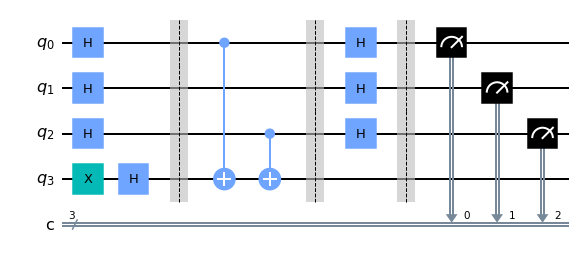

In [8]:
circuit.draw(output='mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1110001': 1}


##### Exercício
Usando menos bits para $s$, faça a simulação e experimento e plote o histograma para medidas na base computacional.

##### References:
- Dave Bacon, Quantum Computing Course, https://courses.cs.washington.edu/courses/cse599d/06wi/.